In [89]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


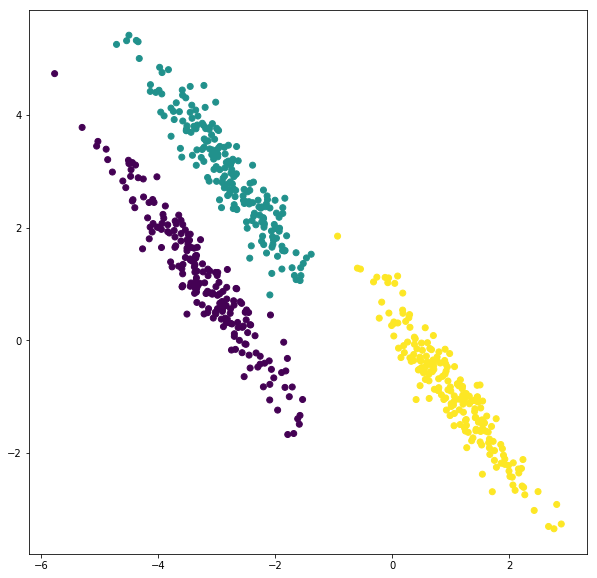

In [90]:
#First dataset

X_1, y_1 = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X_1 = np.dot(X_1, transformation)

plt.figure(figsize = (10,10))
plt.scatter(X_1.T[0],X_1.T[1],c=y_1)
plt.show()


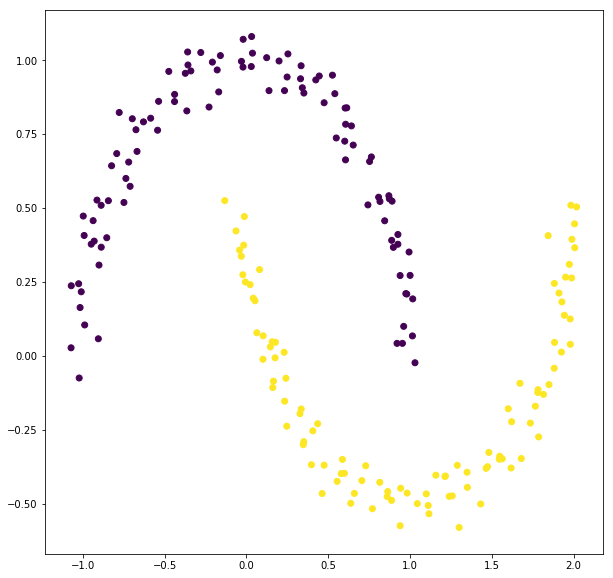

In [27]:
#Second dataset

X_2, y_2 = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.figure(figsize = (10,10))
plt.scatter(X_2.T[0],X_2.T[1],c=y_2)
plt.show()

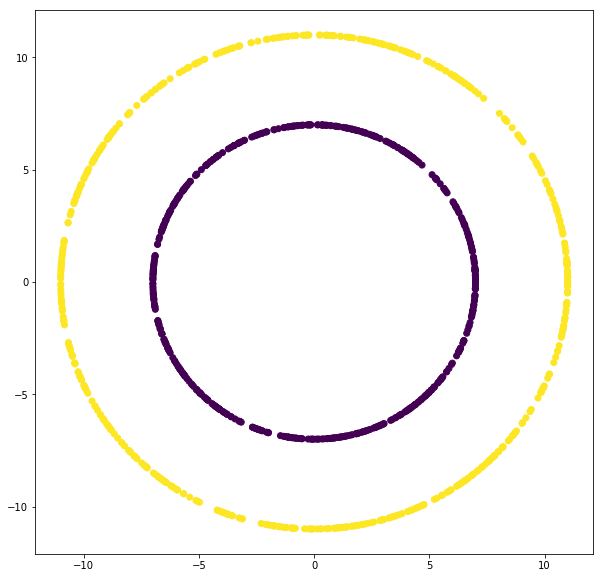

In [28]:
# Third dataset 

r1 = 7
r2 = 11

radians = np.random.uniform(low=0, high = 2*math.pi, size = (600,))
radians = radians.reshape(radians.shape[0],1)

x1_c1 = r1*np.sin(radians)
x2_c1 = r1*np.cos(radians)
x_c1 = np.concatenate((x1_c1,x2_c1),axis = 1)
y_c1 = np.zeros(600)

x1_c2 = r2*np.sin(radians)
x2_c2 = r2*np.cos(radians)
x_c2 = np.concatenate((x1_c2,x2_c2),axis = 1)
y_c2 = np.ones(600)

X_3 = np.concatenate((x_c1,x_c2),axis = 0)
Y_3 = np.concatenate((y_c1,y_c2),axis = 0)

plt.figure(figsize = (10,10))
plt.scatter(X_3.T[0],X_3.T[1],c=Y_3)
plt.show()

In [77]:
# assignimg cluster labels to data points
def assign_clusters(X,C,cluster_names):
    n = X.shape[0]
    labels = []
    for i in range(n):
        x = X[i]
        distances = np.linalg.norm((C - x),axis=1)
        min_dist_label = np.argsort(distances)[0]
        labels.append(min_dist_label)      
 
    return labels

In [83]:
# Lloyd's algorithm on Kmeans
def get_kmeans_cluster(X,y):
    
    min_x_1 = np.min(X.T[0])
    max_x_1 = np.max(X.T[0])
    
    min_x_2 = np.min(X.T[1])
    max_x_2 = np.max(X.T[1])
    
    #number of clusters
    k = np.unique(y).shape[0]    
    
    #random initialization of cluster centers
    C_1 = np.random.uniform(low = min_x_1, high = max_x_1, size= (k,1))
    C_2 = np.random.uniform(low = min_x_2, high = max_x_2, size= (k,1))
    
    C = np.concatenate((C_1,C_2),axis = 1)
    cluster_names = [i for i in range(k)]
    delta_C = 1000
   
    #While the diffenerence in cluster centers is less than 0.001 update centers
    while(delta_C > 0.001):
        
        labels = np.array(assign_clusters(X,C,cluster_names))
        C_new = np.array(C, copy=True)
        
        for i in range(len(cluster_names)):
            Cluster_data_ix = np.where(labels == cluster_names[i])[0]
            X_c = X[Cluster_data_ix]
            C_new[i] = np.sum(X_c,axis=0)/X_c.shape[0]
        
        delta_C = np.linalg.norm(C - C_new)
        C = np.array(C_new, copy = True) 
        #once the desired delta is achieved, plot the clusters with labels
        if delta_C <= 0.01:
            fig, ax = plt.subplots(1,2,figsize = (20,10))
            ax[0].set_title("original labels")
            ax[0].set_title
            ax[0].scatter(X.T[0],X.T[1],c=y)
            
            ax[1].set_title("K means labels")
            ax[1].scatter(X.T[0],X.T[1],c=labels)
            
            plt.suptitle("Orginal Clusters Vs Kmeans Clusters",fontsize = 24, fontweight = 'bold')
            plt.show()
                       

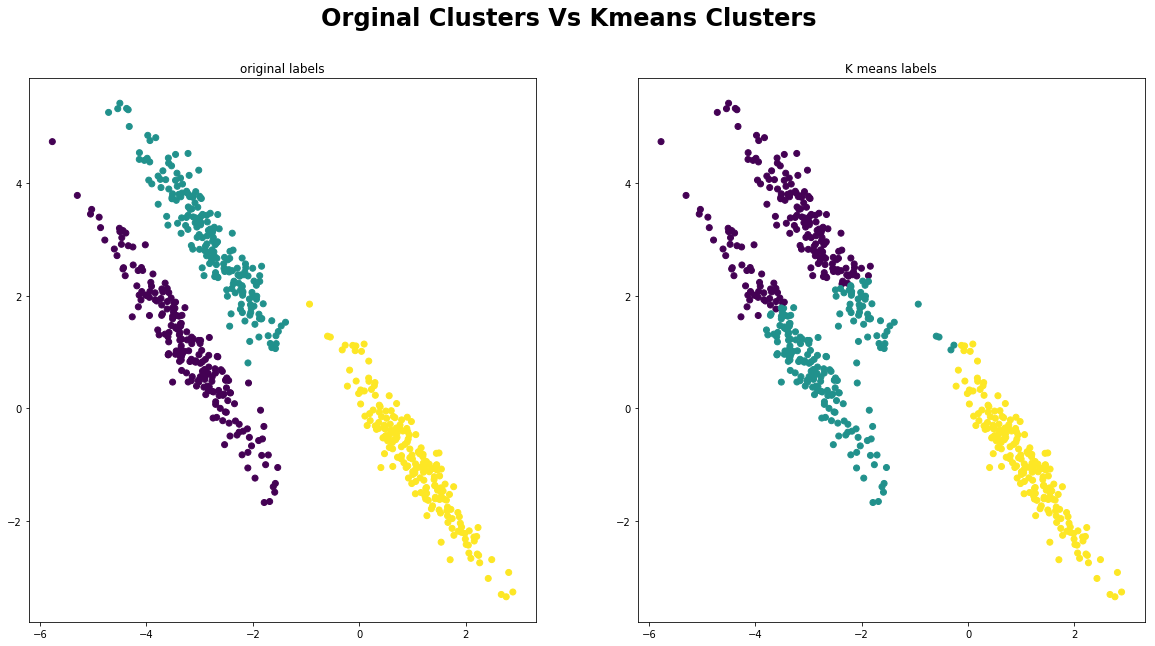

In [84]:
get_kmeans_cluster(X_1,y_1)

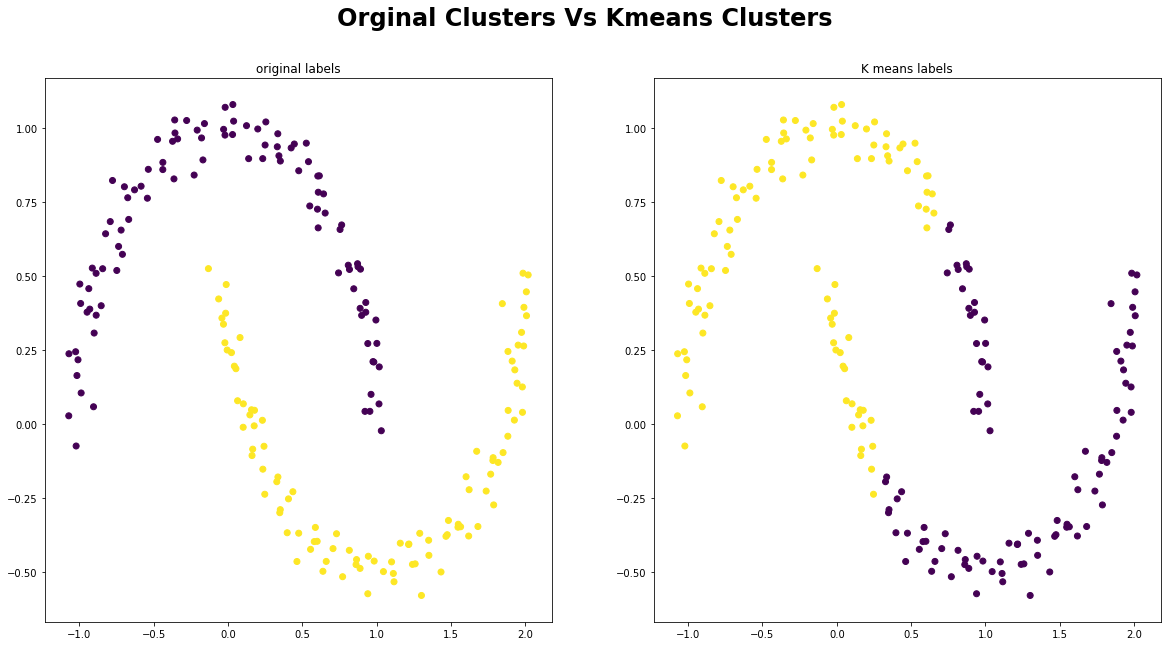

In [85]:
get_kmeans_cluster(X_2,y_2)

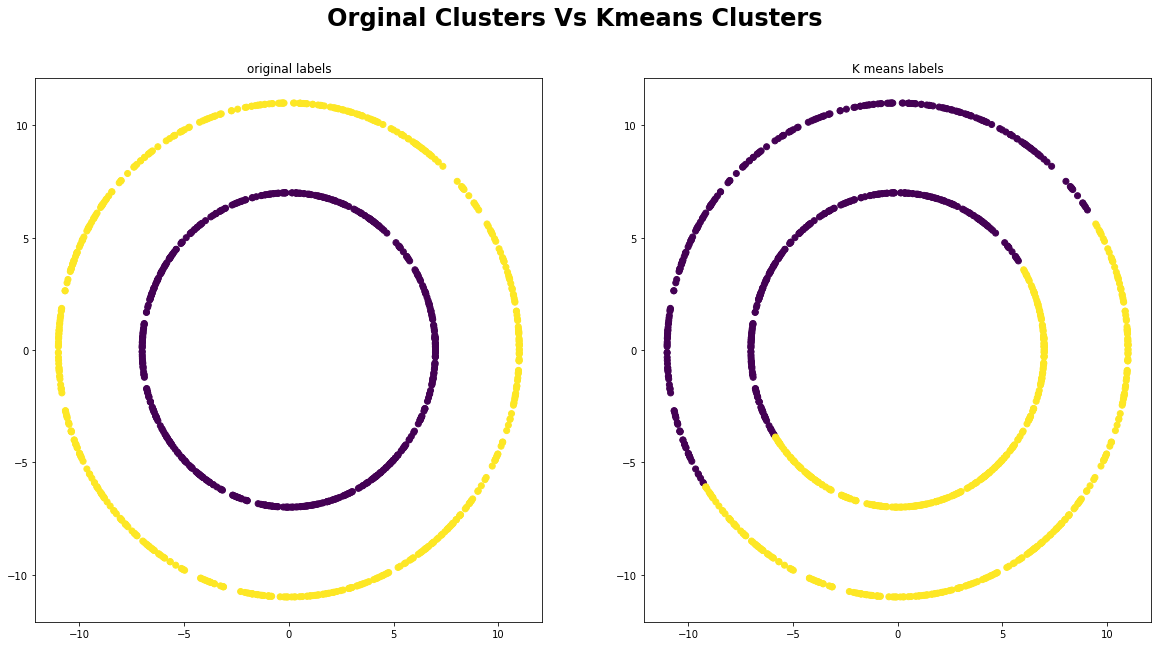

In [88]:
get_kmeans_cluster(X_3,Y_3)